In [27]:
import pandas as pd

stations = pd.read_csv("data/bikeshare_stations.csv")
print(stations.shape)
stations.head()

(102, 14)


,station_id,name,status,address,alternate_name,city_asset_number,property_type,number_of_docks,power_type,footprint_length,footprint_width,notes,council_district,modified_date
0,2541,State Capitol @ 14th & Colorado,closed,206 W. 14th St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2021-01-04 12:00:00.000000 UTC
1,2538,Bullock Museum @ Congress & MLK,closed,1881 Congress Ave.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2021-01-04 12:00:00.000000 UTC
2,2545,ACC - Rio Grande & 12th,closed,700 W. 12th St.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2021-01-04 12:00:00.000000 UTC
3,2546,ACC - West & 12th Street,closed,1231 West Ave.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2021-01-04 12:00:00.000000 UTC
4,2564,5th & San Marcos,closed,991 East 5th,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,2021-01-04 12:00:00.000000 UTC


In [28]:
trips = pd.read_csv("data/bikeshare_trips.csv")
print(trips.shape)
trips.head()

C:\Users\magda\AppData\Local\Temp\ipykernel_31184\1315705371.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv("data/bikeshare_trips.csv")


(1933055, 9)


,trip_id,subscriber_type,bikeid,start_time,start_station_id,start_station_name,end_station_id,end_station_name,duration_minutes
0,9900285908,Annual Membership (Austin B-cycle),400,2014-10-26 14:12:00 UTC,2823.0,Capital Metro HQ - East 5th at Broadway,2544,East 6th & Pedernales St.,10
1,9900289692,Walk Up,248,2015-10-02 21:12:01 UTC,1006.0,Zilker Park West,1008,Nueces @ 3rd,39
2,9900285987,24-Hour Kiosk (Austin B-cycle),446,2014-10-26 15:12:00 UTC,2712.0,Toomey Rd @ South Lamar,2712,Toomey Rd @ South Lamar,31
3,9900285989,24-Hour Kiosk (Austin B-cycle),203,2014-10-26 15:12:00 UTC,2712.0,Toomey Rd @ South Lamar,2712,Toomey Rd @ South Lamar,31
4,9900285991,24-Hour Kiosk (Austin B-cycle),101,2014-10-26 15:12:00 UTC,2712.0,Toomey Rd @ South Lamar,2712,Toomey Rd @ South Lamar,30


# Data celaning
## Cleaning null values

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Trips dataset

<Figure size 1000x600 with 0 Axes>

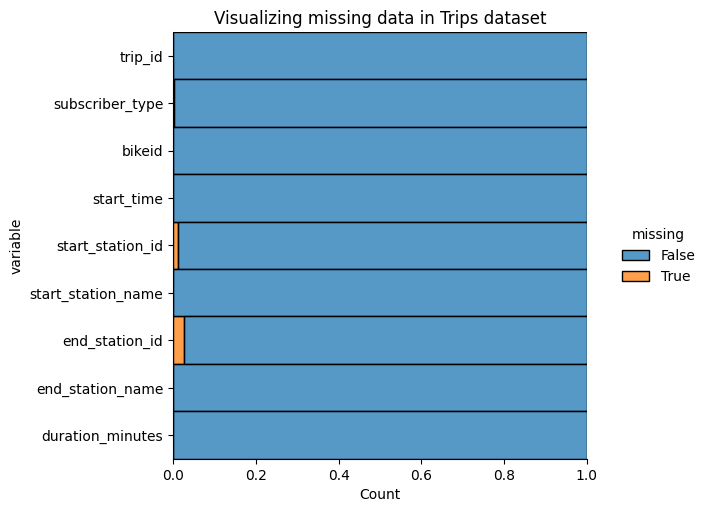

In [33]:
# Ploting the missing data in the trips dataset

plt.figure(figsize=(10,6))
sns.displot(
    data=trips.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title("Visualizing missing data in Trips dataset")
plt.savefig("visualizing_missing_Trips.png", dpi=100)

In [31]:
# Calculate the percentage of null values in each column
null_percent = trips.isnull().sum() / len(trips) * 100
print(null_percent)

# Print the number of columns with more than 70% null values
num_cols_null_percent_100 = (null_percent > 70).sum()
print(num_cols_null_percent_100)

trip_id               0.000000
subscriber_type       0.339825
bikeid                0.037402
start_time            0.000000
start_station_id      1.199449
start_station_name    0.000000
end_station_id        2.638311
end_station_name      0.000000
duration_minutes      0.000000
dtype: float64
0


In [36]:
# Loop through each column and drop it if there are more than 50% null values,
# or fill in the null values with the column mean if there are less than 50%
null_percent = trips.isnull().sum() / len(trips) * 100
for col in trips.columns:
    if null_percent[col] > 50:
        trips.drop(col, axis=1, inplace=True)
    elif null_percent[col] > 0:
        trips[col] = trips[col].fillna('')

In [40]:
# Checking for missing values after cleaning
trips.isnull().sum()

trip_id               0
subscriber_type       0
bikeid                0
start_time            0
start_station_id      0
start_station_name    0
end_station_id        0
end_station_name      0
duration_minutes      0
dtype: int64

### Stations dataset

<Figure size 1000x600 with 0 Axes>

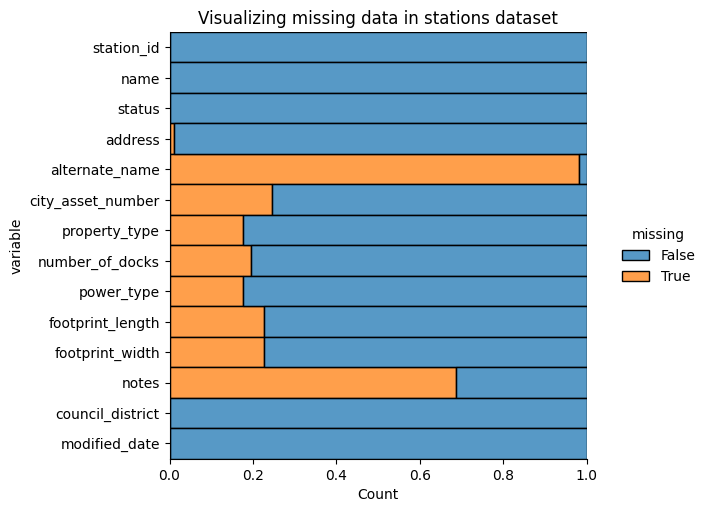

In [34]:
# Ploting the missing data in the stations dataset
plt.figure(figsize=(10,6))
sns.displot(
    data=stations.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.title("Visualizing missing data in stations dataset")
plt.savefig("visualizing_missing_Stations.png", dpi=100)

In [35]:
# Calculate the percentage of null values in each column
null_percent = stations.isnull().sum() / len(stations) * 100
print(null_percent)

# Print the number of columns with more than N null values
num_cols_null_percent_100 = (null_percent > 50).sum()
print(num_cols_null_percent_100)

station_id            0.000000
name                  0.000000
status                0.000000
address               0.980392
alternate_name       98.039216
city_asset_number    24.509804
property_type        17.647059
number_of_docks      19.607843
power_type           17.647059
footprint_length     22.549020
footprint_width      22.549020
notes                68.627451
council_district      0.000000
modified_date         0.000000
dtype: float64
2


In [37]:
# Loop through each column and drop it if there are more than 50% null values,
# or fill in the null values with the column mean if there are less than 50%
null_percent = stations.isnull().sum() / len(stations) * 100
for col in stations.columns:
    if null_percent[col] > 50:
        stations.drop(col, axis=1, inplace=True)
    elif null_percent[col] > 0:
        stations[col] = stations[col].fillna('')

In [38]:
# Checking for missing values after cleaning
stations.isnull().sum()

station_id           0
name                 0
status               0
address              0
city_asset_number    0
property_type        0
number_of_docks      0
power_type           0
footprint_length     0
footprint_width      0
council_district     0
modified_date        0
dtype: int64